(0.0, 0, 0, 0)
(0.00070957263, 1, 1, 182)
(0.0017042893, -2, 3, 10)
(0.0038933568, 3, 0, 230)


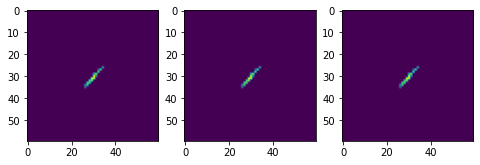

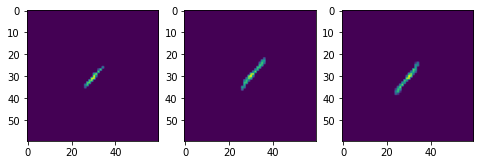

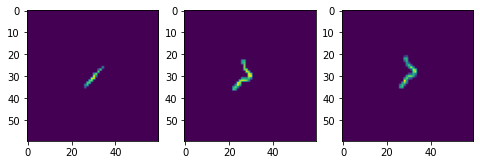

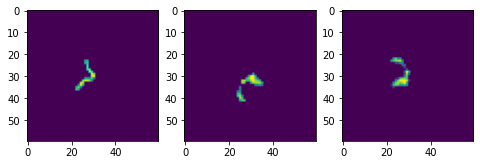

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance

from commons import tmp_visualize, dm_func_mean2
import numpy as np
from PIL import Image
import os
from scipy.ndimage import rotate
from dataset_loader import load_images, load_from_file
from matplotlib import pyplot as plt

DOTS_SRC = 'cache/dots_v2.pickle'
TRACKS_SRC = 'cache/tracks_v2.pickle'
WORMS_SRC = 'cache/worms_v2.pickle'
ARTIFACTS_SRC = 'cache/artifacts_v2.pickle'


images_tracks = load_from_file(TRACKS_SRC)[0]
images_worms = load_from_file(WORMS_SRC)[0]

#tmp_visualize(images_tracks, images_tracks)
#tmp_visualize(images_worms, images_worms)

track_1 = images_tracks[1017]
track_2 = images_tracks[1044]
worm_1 = images_worms[208]
worm_2 = images_worms[17]

track_1e = np.expand_dims(track_1, axis=-1)
track_2e = np.expand_dims(track_2, axis=-1)
worm_1e = np.expand_dims(worm_1, axis=-1)
worm_2e = np.expand_dims(worm_2, axis=-1)


def rotate_and_fix_background(image, deg):
    mask = np.where(image == 0, 0.0, 1.0)
    augmented_image = rotate(image, deg, reshape=False)
    augmented_mask = rotate(mask, deg, reshape=False)
    augmented_image = np.where(augmented_mask < 0.25, 0, augmented_image)
    augmented_image = np.where(augmented_image < 0, 0, augmented_image)
    augmented_image = np.where(augmented_image > 1, 1, augmented_image)
    return augmented_image


def round_and_translate(img, trans_x, trans_y, round_deg):
    img2 = rotate_and_fix_background(img, round_deg)
    img3 = np.roll(img2, trans_x, axis=0)
    img4 = np.roll(img3, trans_y, axis=1)
    return img4


def dm_func_mean(img1, img2):
    return np.mean((img1 - img2) ** 2)


#translate_steps = [-2, 0, 2]
#translate_steps = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
translate_steps = [-4, -3, -2, -1, 0, 1, 2, 3, 4]

def search_for_minimal(img1, img2, dm_func=dm_func_mean):
    v_min = 999999
    trans_x_min = 0
    trans_y_min = 0
    round_deg_min = 0
    img_min = None
    for trans_x in translate_steps:
        for trans_y in translate_steps:
            for round_deg in range(0, 360):
                img2_t = round_and_translate(img2, trans_x, trans_y, round_deg)
                v = dm_func(img1, img2_t)
                if v < v_min:
                    v_min = v
                    trans_x_min = trans_x
                    trans_y_min = trans_y
                    round_deg_min = round_deg
                    img_min = img2_t
    #plt.imshow(data, cmap='gray')
    fig = plt.figure(figsize=(8, 8))
    fig.add_subplot(1, 3, 1)
    plt.imshow(img1)
    fig.add_subplot(1, 3, 2)
    plt.imshow(img2)
    fig.add_subplot(1, 3, 3)
    plt.imshow(img_min)
    return (v_min, trans_x_min, trans_y_min, round_deg_min), img_min


t1_t1 = search_for_minimal(track_1e, track_1e)
t1_t2 = search_for_minimal(track_1e, track_2e)
t1_w1 = search_for_minimal(track_1e, worm_1e)
w1_w2 = search_for_minimal(worm_1e, worm_2e)

print(t1_t1[0])
print(t1_t2[0])
print(t1_w1[0])
print(w1_w2[0])